<a href="https://colab.research.google.com/github/NikhilParihar-4/Codsoft-/blob/main/Task%20-%202%20Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/creditcard.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


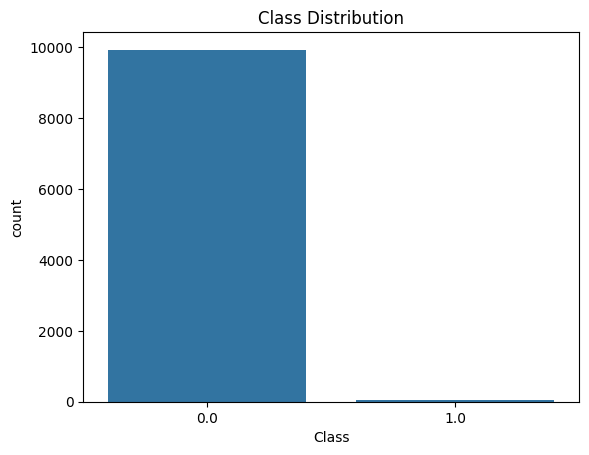

In [4]:
# Distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

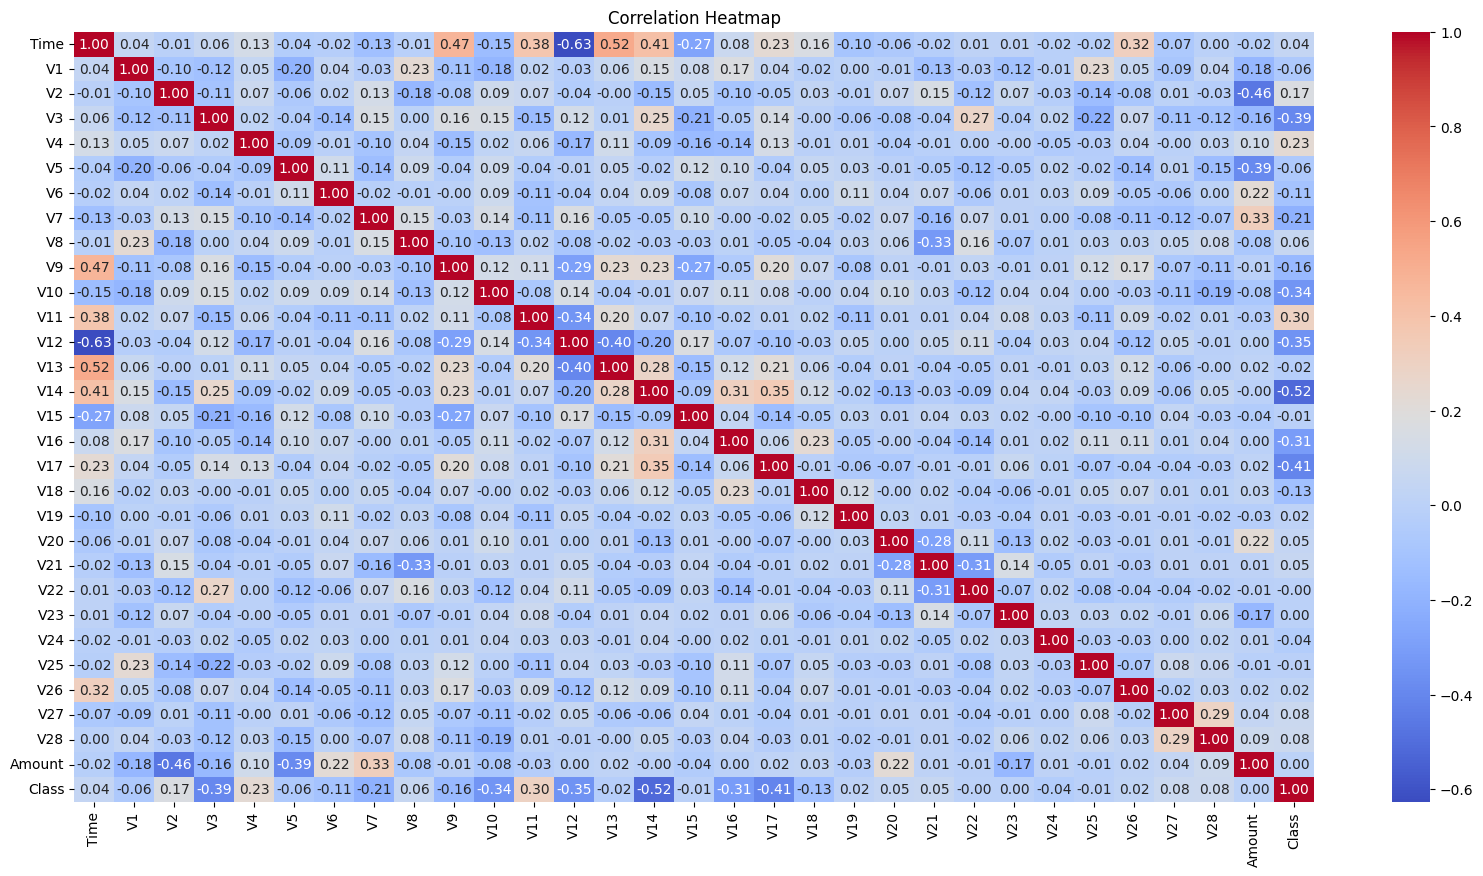

In [5]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

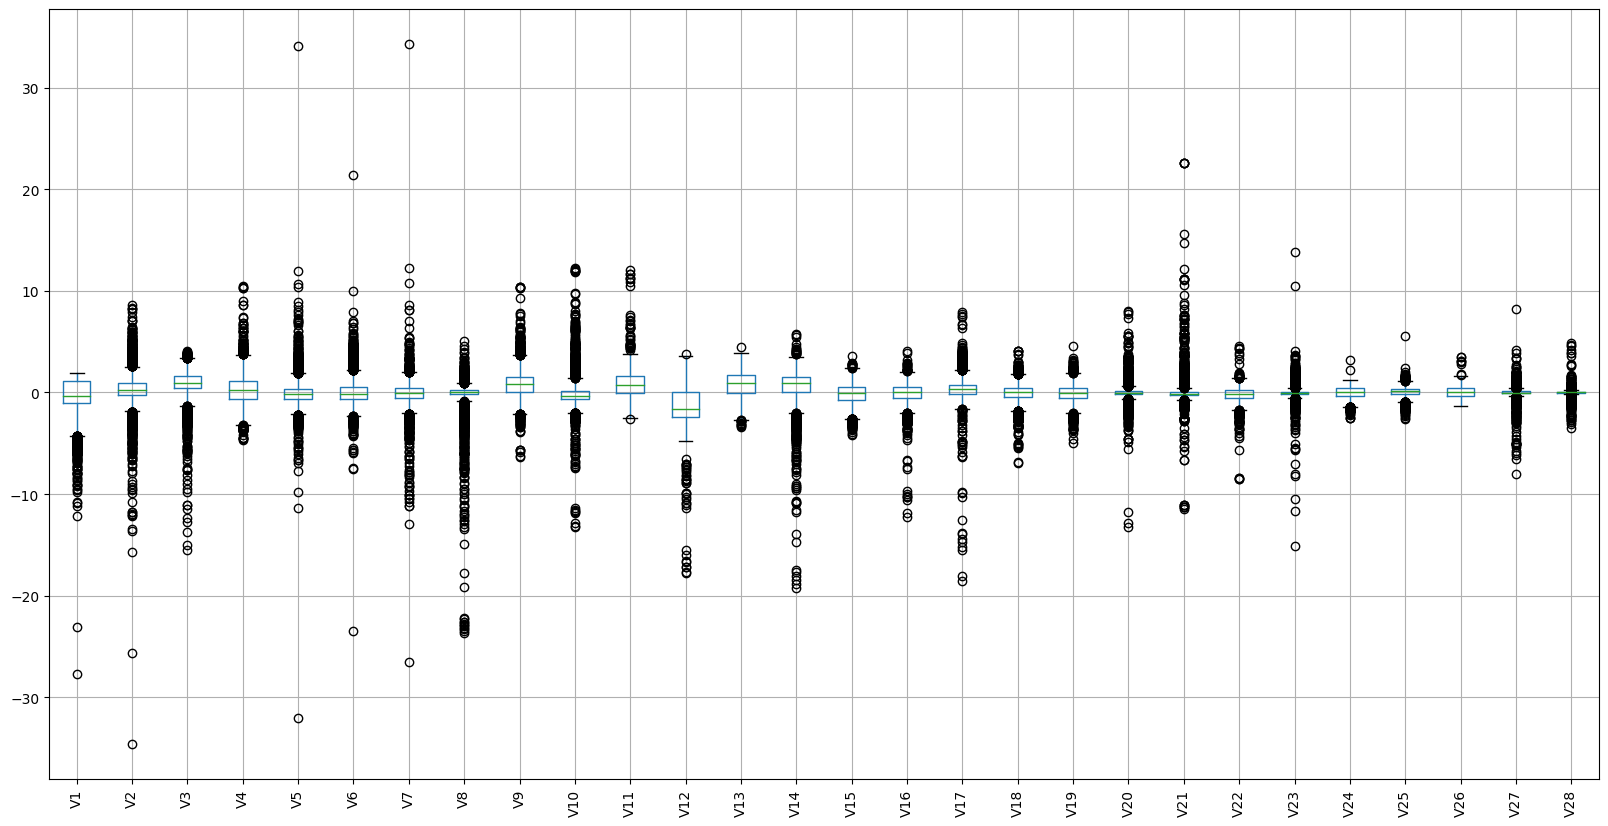

In [6]:
# Boxplot for features
plt.figure(figsize=(20, 10))
df.drop(['Time', 'Amount', 'Class'], axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

In [7]:
# Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
df_clean = df.dropna(subset=['Class'])
X = df_clean.drop(['Class', 'Time'], axis=1)
y = df_clean['Class']
X_res, y_res = sm.fit_resample(X, y)
print(y.value_counts())
print(y_res.value_counts())

Class
0.0    9926
1.0      38
Name: count, dtype: int64
Class
0.0    9926
1.0    9926
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
#scale features
res_scaler = StandardScaler()
X_res_scaled = res_scaler.fit_transform(X_res)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_res_scaled = pd.DataFrame(X_res_scaled, columns=X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [10]:
from sklearn.ensemble import IsolationForest
import xgboost as xgb

In [11]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.1,random_state=42).fit(X_scaled)
y_pred_iso = iso_forest.predict(X_scaled)
print(pd.Series(y_pred_iso).value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    8967
-1     997
Name: count, dtype: int64


              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      9926
         1.0       0.04      1.00      0.07        38

    accuracy                           0.90      9964
   macro avg       0.52      0.95      0.51      9964
weighted avg       1.00      0.90      0.95      9964



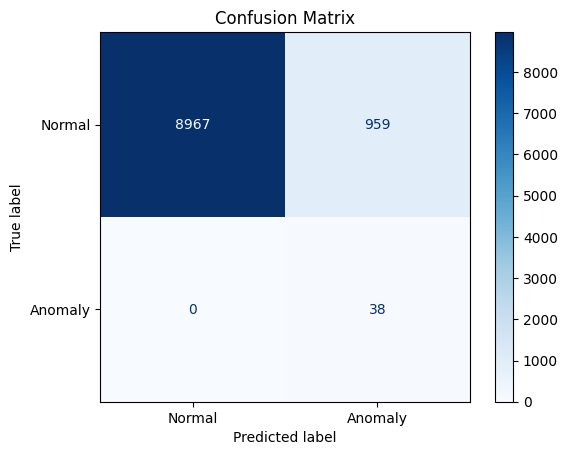

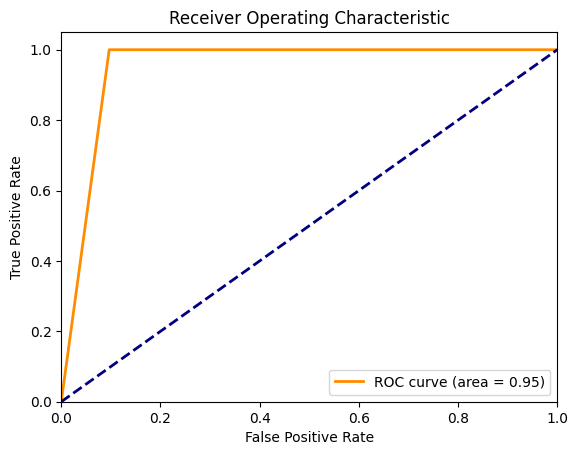

In [12]:
y_pred_iso_binary = np.where(y_pred_iso == 1, 0, 1)

print(classification_report(y, y_pred_iso_binary))

# Compute the confusion matrix
cm = confusion_matrix(y, y_pred_iso_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC for Isolation Forest
fpr, tpr, _ = roc_curve(y, y_pred_iso_binary)
roc_auc = roc_auc_score(y, y_pred_iso_binary)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

supervised learning

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1992
         1.0       1.00      1.00      1.00      1979

    accuracy                           1.00      3971
   macro avg       1.00      1.00      1.00      3971
weighted avg       1.00      1.00      1.00      3971



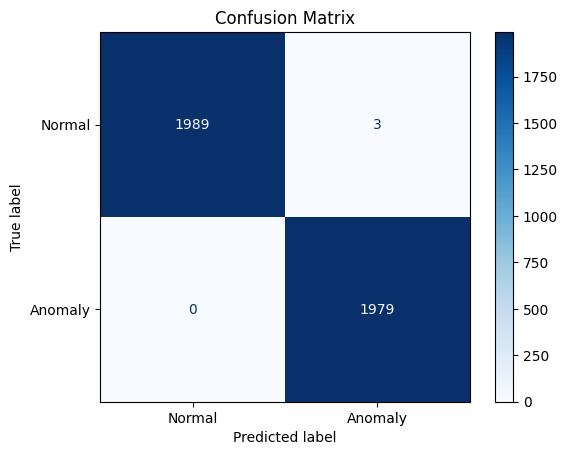

In [14]:
def evaluate_model(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])

    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# Logistic Regression Evaluation
print("Logistic Regression")
evaluate_model(y_test, y_pred_lr)

XGBoost classifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1992
         1.0       1.00      1.00      1.00      1979

    accuracy                           1.00      3971
   macro avg       1.00      1.00      1.00      3971
weighted avg       1.00      1.00      1.00      3971



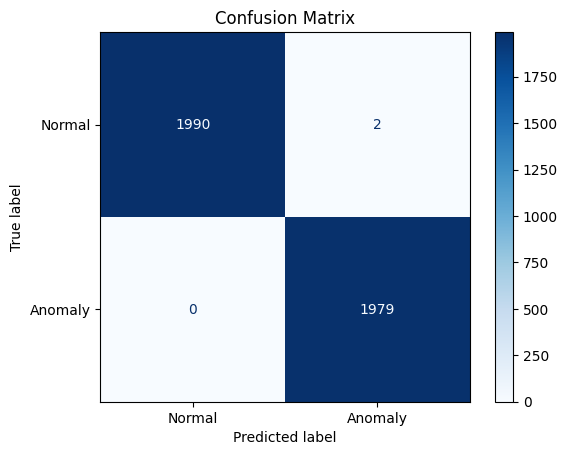

In [15]:
print("XGBoost classifier")
evaluate_model(y_test, y_pred_xgb)

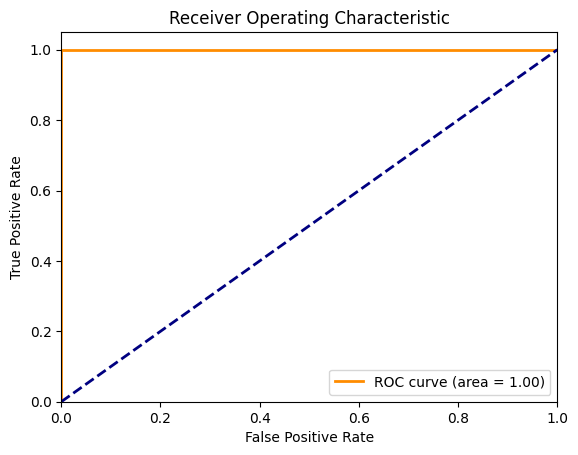

In [16]:
# ROC-AUC for XGBoost
y_pred_xgb_clf_proba = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_clf_proba)
roc_auc = roc_auc_score(y_test, y_pred_xgb_clf_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
def predict_fraud(input_data, features):

  for feature in features:
      if feature not in input_data.columns:
          input_data[feature] = 0

  input_data = input_data[features]
  input_data_scaled = scaler.transform(input_data)

  prediction = xgb_clf.predict(input_data_scaled)

  if prediction[0] == 1:
    return 'Fraud'
  else:
    return 'Not Fraud'

training_features = X_train.columns.tolist()

V1 = float(input("enter V1: "))
V2 = float(input("enter V2: "))
V3 = float(input("enter V3: "))
V28 = float(input("enter V28: "))
Amount = float(input("enter Amount: "))

new_transaction = pd.DataFrame({
    'V1': [V1],
    'V2': [V2],
    'V3': [V3],
    'V28': [V28],
    'Amount': [Amount],
})
prediction = predict_fraud(new_transaction, training_features)
print("\n")
print(prediction)

enter V1: 1.16
enter V2: 3.41
enter V3: -1.37
enter V28: -1.22
enter Amount: 88.34


Fraud
